# 데이터 불러오기 / 정리

In [1]:
import pandas as pd

diamond = pd.read_csv('C:\\Users\\승우\\Desktop\\diamonds.csv', engine='python')

diamond = diamond.iloc[:,1:]
diamond = pd.get_dummies(diamond)
diamond.head()

,carat,tdp,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0


## 단순회귀 / 다중회귀를 비교하고 싶다. (슬라이드 20 페이지)

### 단순회귀에서 독립변수를 carat, 종속변수를 price라고 가정

In [2]:
#Series 데이터는 LinearRegression에서 인식을 못하더라구요.. 애먹었습니다..
X_simple = diamond['carat'].to_frame()
y = diamond['price'].to_frame()

X_simple.head()

,carat
0,0.23
1,0.21
2,0.23
3,0.29
4,0.31


In [3]:
from sklearn.model_selection import train_test_split

X_sim_train, X_sim_test, y_train, y_test = train_test_split(X_simple, y, test_size=.3, random_state=1)

In [4]:
from sklearn.linear_model import LinearRegression

sim_reg = LinearRegression()
sim_reg.fit(X_sim_train, y_train)
sim_reg.score(X_sim_test, y_test)

print('carat을 독립변수로 하는 단순선형회귀모델의 score: {:f}'.format(sim_reg.score(X_sim_test, y_test)))

carat을 독립변수로 하는 단순선형회귀모델의 score: 0.849320


### 다중회귀에서 feature=3으로 가정하고, 그 독립변수를 carat과 tdp,table로 선택 //단지 설명력이 높아진다는 걸 보이고 싶은 것이기 때문에 임의로 선택한 것

In [5]:
X_sev_features = diamond[['carat', 'tdp', 'table']]

In [6]:
X_mul2_train, X_mul2_test, y_train, y_test = train_test_split(X_sev_features, y, test_size=.3, random_state=1)

mul2_reg = LinearRegression()
mul2_reg.fit(X_mul2_train, y_train)
mul2_reg.score(X_mul2_test, y_test)

print('carat, tdp, table을 독립변수로 하는 단순선형회귀모델의 score: {:.3f}'.format(mul2_reg.score(X_mul2_test, y_test)))

carat, tdp, table을 독립변수로 하는 단순선형회귀모델의 score: 0.854


# 다중회귀와 릿지의 계수 비교

In [7]:
X = diamond.drop('price', axis=1)
y = diamond['price'].to_frame()

X.head()

,carat,tdp,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [9]:
mult_model = LinearRegression()
mult_model.fit(X_train, y_train)
mult_model.coef_
mult_model.score(X_test, y_test)

print(mult_model.coef_)
print('다중회귀의 score:{:f}'.format(mult_model.score(X_test, y_test)))

[[10397.37185625  -121.81880607   -41.66235333 -1155.72324407
     19.7933021     77.63214303  -999.42886334   -11.75181617
    498.05562555   227.6881908    285.43686317]]
다중회귀의 score:0.863948


In [10]:
from sklearn.linear_model import Ridge

Ridge1 = Ridge()
Ridge20 = Ridge(alpha=10)
Ridge1.fit(X_train, y_train)
Ridge20.fit(X_train, y_train)

print(Ridge1.coef_)
print('릿지 alpha=1의 score: {:f}'.format(Ridge1.score(X_test, y_test)))
print(Ridge20.coef_)
print('릿지 alpha=10의 score: {:f}'.format(Ridge20.score(X_test, y_test)))

[[10371.25940966  -121.33755369   -41.64315472 -1144.56771688
     19.82526895    76.97585539  -998.69113682   -12.01876366
    497.85555975   227.51961291   285.33472782]]
릿지 alpha=1의 score: 0.863919
[[10142.70070187  -117.15643734   -41.47864189 -1047.355535
     20.27550329    71.62913565  -992.06561741   -14.37808546
    496.04438706   226.01349481   284.38582099]]
릿지 alpha=10의 score: 0.863633


# 릿지와 라쏘의 계수 비교

In [11]:
from sklearn.linear_model import Lasso

Lasso1 = Lasso()
Lasso20 = Lasso(alpha=20)
Lasso1.fit(X_train, y_train)
Lasso20.fit(X_train, y_train)

print(Lasso1.coef_)
print('라쏘 alpha=1의 score: {:f}'.format(Lasso1.score(X_test, y_test)))
print(Lasso20.coef_)
print('라쏘 alpha=10의 score: {:f}'.format(Lasso20.score(X_test, y_test)))

[ 1.02681442e+04 -1.18074463e+02 -4.29373513e+01 -1.05292032e+03
  4.29441537e+00  2.25566909e+01 -1.18851200e+03 -2.26096681e+02
  2.66144943e+02 -0.00000000e+00  5.56858881e+01]
라쏘 alpha=1의 score: 0.863819
[7805.44283004 -103.10908054  -63.56969845  -13.2360921    -0.
   -0.         -452.70877782   -0.          176.94518452    0.
    0.        ]
라쏘 alpha=10의 score: 0.855919


# 로지스틱 회귀분석 예시

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.keys())

X = iris['data']
y = iris['target']

X, y, iris.DESCR

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

## 목표: 꽃받침 길이를 이용하여 Iris-Sentosa 종을 분류

In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X_sp_length = X[:, 1].reshape(-1,1)
y = (y==0).astype(np.int)

log_reg = LogisticRegression()
log_reg.fit(X_sp_length,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

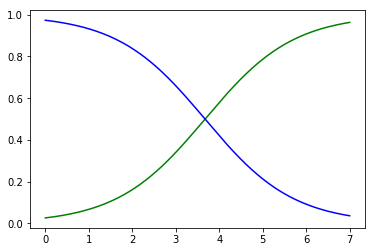

In [14]:
X_new = np.linspace(0, 7, 1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:,1], 'g-', label='Iris-Sentosa')
plt.plot(X_new, y_prob[:,0], 'b-', label='Not Iris-Sentosa')

In [15]:
log_reg.predict([[2.0], [4.5]])

array([0, 1])